**以下のセルは初回のみ実施が必要。一度やったらコメントアウトまたは削除してもよい。**

In [1]:
#import Pkg
#Pkg.add("CGcoefficient")
#Pkg.add("Plots")
#Pkg.add("PyPlot")

**ここから本番**

*まずは必要なJuliaのソースコードの読み込み*

In [3]:
include("basic.jl")
include("math.jl")
include("nuclei.jl")
include("shfbcs.jl")
include("crpa.jl")

Main.Crpa

*計算を実行させるセル*

In [4]:
using Plots
using .Basic
using .Nuclei
using .Shfbcs
using .Math
using .Crpa

function main(nucl::Nucleus, mf::MeanField, skyrme::Skyrme, crpa::CRPA)
    #Skyrme-Hartree-Fockの実施
    Calc_shfbcs(nucl, skyrme, mf)
    #Linear Response の計算の実施
    Calc_continuum(nucl, skyrme, mf, crpa)
end

main (generic function with 1 method)

**プログラムをコントロールするセル、基本的にここをいじる**

In [10]:
#原子核を準備する。
#                 Z    A
nucl=Set_nucleus(8, 16)

#Skyrme相互作用を準備する（ここではゼロレンジ Skyrme型の相互作用を用いる)
t0,t1,t2,t3,x0,x1,x2,x3,w0,w0p,alp,vpair,ij2=SkyrmeParameter("skm")
skyrme=Skyrme(t0,t1,t2,t3,x0,x1,x2,x3,w0,w0p,alp,vpair,ij2)

#Skyrme-Hartree-Fockの準備
mf=MeanField()
fill!(mf.Binv, nucl.Binv0)

#Linear Response の計算の準備
crpa=CRPA()
crpa.ISV=0 # 0:Isoscalar 1:Isovector
crpa.L=2 # Angular momentum of external field
crpa.scalingf=0.5 #Scaling factor for residual interaction

@time main(nucl, mf, skyrme, crpa)

neutron
 Num      energy   node j  l   occupation
   5    -4.3035058   1  1  0    0.0000000
   4    -7.2987675   0  5  2    0.0000000
   3   -13.5446858   0  1  1    1.0000000
   2   -19.8817070   0  3  1    1.0000000
   1   -33.3065753   0  1  0    1.0000000
FermiE -10.0000000
 
proton
 Num      energy   node j  l   occupation
   5    -1.3429059   1  1  0    0.0000000
   4    -4.1030738   0  5  2    0.0000000
   3   -10.2638737   0  1  1    1.0000000
   2   -16.4755076   0  3  1    1.0000000
   1   -29.7383086   0  1  0    1.0000000
FermiE -10.0000000
 47.241585 seconds (573.48 M allocations: 12.272 GiB, 1.02% gc time)


** 図の描写をする **

In [5]:
#束縛エネルギーの出力
println("Total Energy=",nucl.Etot)

Total Energy=-127.7164075829839


In [1]:
#Skyrme-Hartree-Fockで得られた密度の出力
r=Vector(dr:dr:rbox)
plot(r, nucl.rho[:,1], xlabel="radial coordinate (fm)", ylabel="density (fm^{-3})", xlims=(0,6), label="Proton", title="Density")
plot!(r, nucl.rho[:,2], label="Neutron")

LoadError: UndefVarError: `nucl` not defined

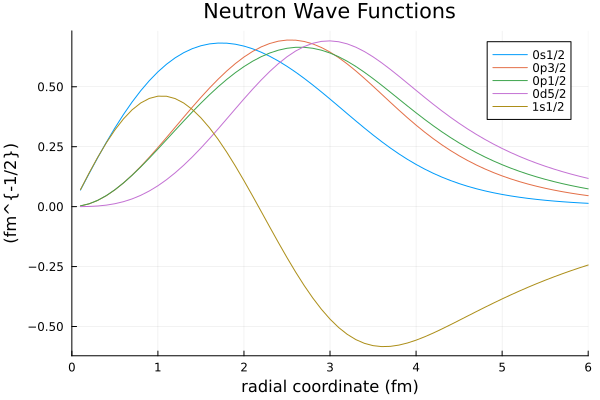

In [7]:
#Skyrme-Hartree-Fockで得られた波動関数の出力
plot(r, nucl.psi[:,1,2], xlabel="radial coordinate (fm)", ylabel="(fm^{-1/2})", xlims=(0,6), label="0s1/2", title="Neutron Wave Functions")
plot!(r, nucl.psi[:,2,2], label="0p3/2")
plot!(r, nucl.psi[:,3,2], label="0p1/2")
plot!(r, nucl.psi[:,4,2], label="0d5/2")
plot!(r, nucl.psi[:,5,2], label="1s1/2")

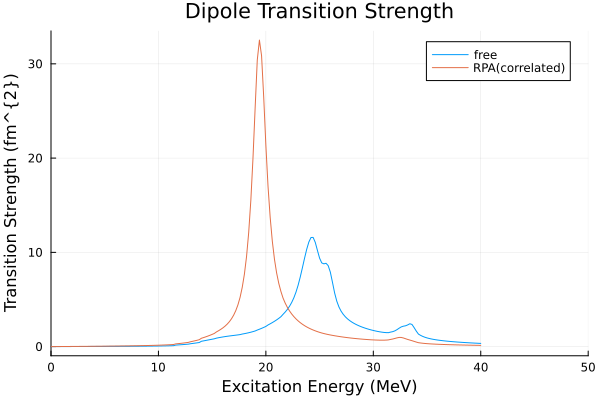

In [11]:
#Cotinuume-RPAで遷移強度の出力
plot(crpa.ex, crpa.str_free, xlabel="Excitation Energy (MeV)", ylabel="Transition Strength (fm^{2})", xlims=(0,50), label="free", title="Dipole Transition Strength")
plot!(crpa.ex, crpa.str_rpa, label="RPA(correlated)")

$$ rY_{10}=\sqrt{3/4\pi} z $$